# EDA on Numerical Data


In [1]:
%config InlineBackend.figure_format='retina'
import logging
from ekorpkit import eKonf

logging.basicConfig(level=logging.WARNING)
print("version:", eKonf.__version__)
print("is notebook?", eKonf.is_notebook())
print("is colab?", eKonf.is_colab())
print("evironment varialbles:")
eKonf.print(eKonf.env().dict())

version: 0.1.33+20.g8433774.dirty
is notebook? True
is colab? False
evironment varialbles:
{'EKORPKIT_CONFIG_DIR': '/workspace/projects/ekorpkit-book/config',
 'EKORPKIT_DATA_DIR': None,
 'EKORPKIT_PROJECT': 'ekorpkit-book',
 'EKORPKIT_WORKSPACE_ROOT': '/workspace',
 'NUM_WORKERS': 230}


In [2]:
data_dir = "../data/fomc"


## Load preprocessed data


In [3]:
econ_data = eKonf.load_data("econ_data2.parquet", data_dir)
econ_data.tail()

,unscheduled,forecast,confcall,speaker,rate,rate_change,rate_decision,rate_changed,GDP,GDP_diff_prev,...,Rate,Taylor,Balanced,Inertia,Taylor-Rate,Balanced-Rate,Inertia-Rate,Taylor_diff,Balanced_diff,Inertia_diff
date,,,,,,,,,,,,,,,,,,,,,
2021-11-03,False,False,False,Jerome Powell,0.25,0.00,0.0,0,19478.893,0.570948,...,0.25,5.747177,4.940210,-0.528532,5.497177,4.690210,-0.778532,0.0,0.0,0.0
2021-12-15,False,True,False,Jerome Powell,0.25,0.00,0.0,0,19478.893,0.570948,...,0.25,6.472329,5.665362,-0.637304,6.222329,5.415362,-0.887304,0.0,0.0,0.0
2022-01-26,False,False,False,Jerome Powell,0.25,0.00,0.0,0,19478.893,0.570948,...,0.25,7.222928,6.415961,-0.749894,6.972928,6.165961,-0.999894,0.0,0.0,0.0
2022-03-16,False,True,False,Jerome Powell,0.50,0.25,1.0,1,19806.290,1.680778,...,0.25,8.499377,8.267766,-1.027665,8.249377,8.017766,-1.277665,0.0,0.0,0.0
2022-05-04,False,False,False,Jerome Powell,1.00,0.50,1.0,1,19735.895,-0.355417,...,0.50,8.094924,7.420939,-0.688141,7.594924,6.920939,-1.188141,0.0,0.0,0.0


## EDA on numerical data


In [4]:
# Add previous rate decision to see inertia effect
econ_data["Rate Decision"] = econ_data["rate_decision"].map(
    lambda x: "Cut" if x <= -1 else "Hike" if x >= 1 else "Hold"
)
econ_data["rate_decision"] = econ_data["rate_decision"].map(
    lambda x: -1 if x <= -1 else 1 if x >= 1 else 0
)
econ_data["prev_decision"] = econ_data["rate_decision"].shift(1)
econ_data["next_decision"] = econ_data["rate_decision"].shift(-1)
econ_data[["Rate Decision", "rate_decision", "prev_decision", "next_decision"]].head()

,Rate Decision,rate_decision,prev_decision,next_decision
date,,,,
1982-10-05,Cut,-1,NaN,-1.0
1982-11-16,Cut,-1,-1.0,0.0
1982-12-21,Hold,0,-1.0,0.0
1983-01-14,Hold,0,0.0,0.0
1983-01-21,Hold,0,0.0,0.0


In [5]:
econ_data.describe()


,rate,rate_change,rate_decision,rate_changed,GDP,GDP_diff_prev,GDP_diff_year,GDPPOT,GDPPOT_diff_prev,GDPPOT_diff_year,...,Balanced,Inertia,Taylor-Rate,Balanced-Rate,Inertia-Rate,Taylor_diff,Balanced_diff,Inertia_diff,prev_decision,next_decision
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,...,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,414.000000,414.000000
mean,3.968976,-0.019880,-0.012048,0.334940,12815.408884,0.657814,2.523898,13018.548855,0.643467,2.616803,...,3.324700,2.893358,0.005563,-0.665962,-1.097304,0.002576,0.005238,-0.002322,-0.014493,-0.009662
std,3.036522,0.228714,0.579313,0.472539,3719.399375,1.085580,2.203739,3776.658124,0.185616,0.756947,...,2.069550,2.373858,1.899151,2.141286,0.711029,0.058706,0.088255,0.026755,0.577867,0.577968
min,0.000000,-1.000000,-1.000000,0.000000,6804.139000,-8.937251,-9.083737,7271.207419,0.318708,1.303969,...,0.000000,-1.027665,-4.920215,-8.061836,-2.699376,-0.400621,-0.400621,-0.425000,-1.000000,-1.000000
25%,1.000000,0.000000,0.000000,0.000000,9394.834000,0.426261,1.701703,9597.373675,0.475884,1.915027,...,1.731034,0.561801,-1.470860,-1.661544,-1.567363,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,13183.890000,0.678051,2.673107,13014.429940,0.642412,2.615226,...,3.386536,2.788555,0.052807,-0.293935,-1.130361,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,0.000000,0.000000,1.000000,15781.342000,0.988107,3.908365,16227.234340,0.777802,3.150223,...,4.723309,4.507101,1.361705,0.475418,-0.455663,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.500000,1.125000,1.000000,1.000000,19806.290000,7.547535,12.226677,20003.730000,1.058177,4.280368,...,8.267766,8.901506,8.249377,8.017766,-0.037500,0.616857,1.233715,0.060093,1.000000,1.000000


In [6]:
econ_data.isnull().sum()


unscheduled      0
forecast         0
confcall         0
speaker          0
rate             0
                ..
Balanced_diff    0
Inertia_diff     0
Rate Decision    0
prev_decision    1
next_decision    1
Length: 61, dtype: int64

## Plot rate decision count


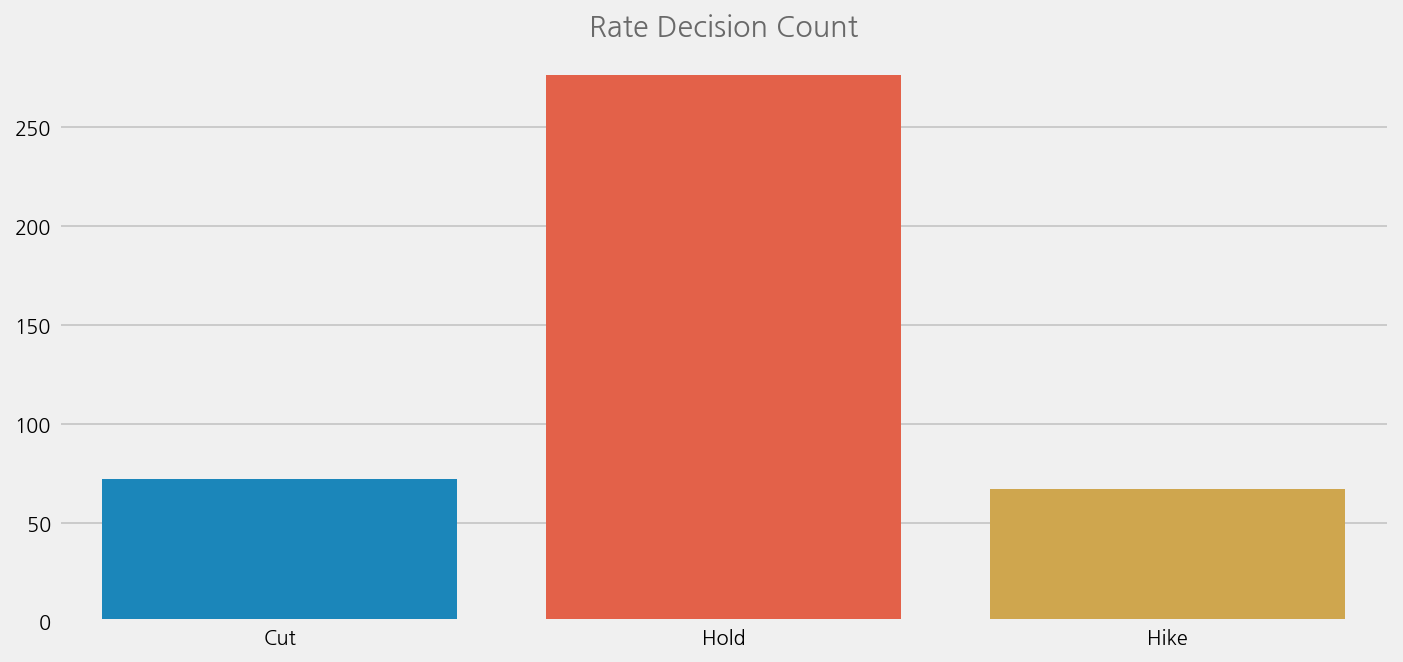

In [7]:
cfg = eKonf.compose("visualize/plot=countplot")
cfg.countplot.x = "Rate Decision"
cfg.figure.figsize = (10, 5)
cfg.ax.title = "Rate Decision Count"
eKonf.instantiate(cfg, data=econ_data)


Highly imbalanced to 0 (hold), so need to consider this point. Always predicting 0 (hold) will result in the accuracy of more than 60%.


## Correlation


In [8]:
corr_columns = [
    "rate_decision",
    "next_decision",
    "prev_decision",
    "unscheduled",
    "forecast",
    "confcall",
    "GDP_diff_prev",
    "GDP_diff_year",
    "GDPPOT_diff_prev",
    "GDPPOT_diff_year",
    "PCE_diff_prev",
    "PCE_diff_year",
    "CPI_diff_prev",
    "CPI_diff_year",
    "UNEMP",
    "UNEMP_diff_prev",
    "UNEMP_diff_year",
    "EMP",
    "EMP_diff_prev",
    "EMP_diff_year",
    "PMI",
    "PMI_diff_prev",
    "PMI_diff_year",
    "RSALES_diff_prev",
    "RSALES_diff_year",
    "HSALES_diff_prev",
    "HSALES_diff_year",
    "Taylor_diff",
    "Balanced_diff",
    "Inertia_diff",
    "rate",
    "rate_change",
    "rate_changed",
]

corr_data = econ_data[corr_columns].astype(float).corr()


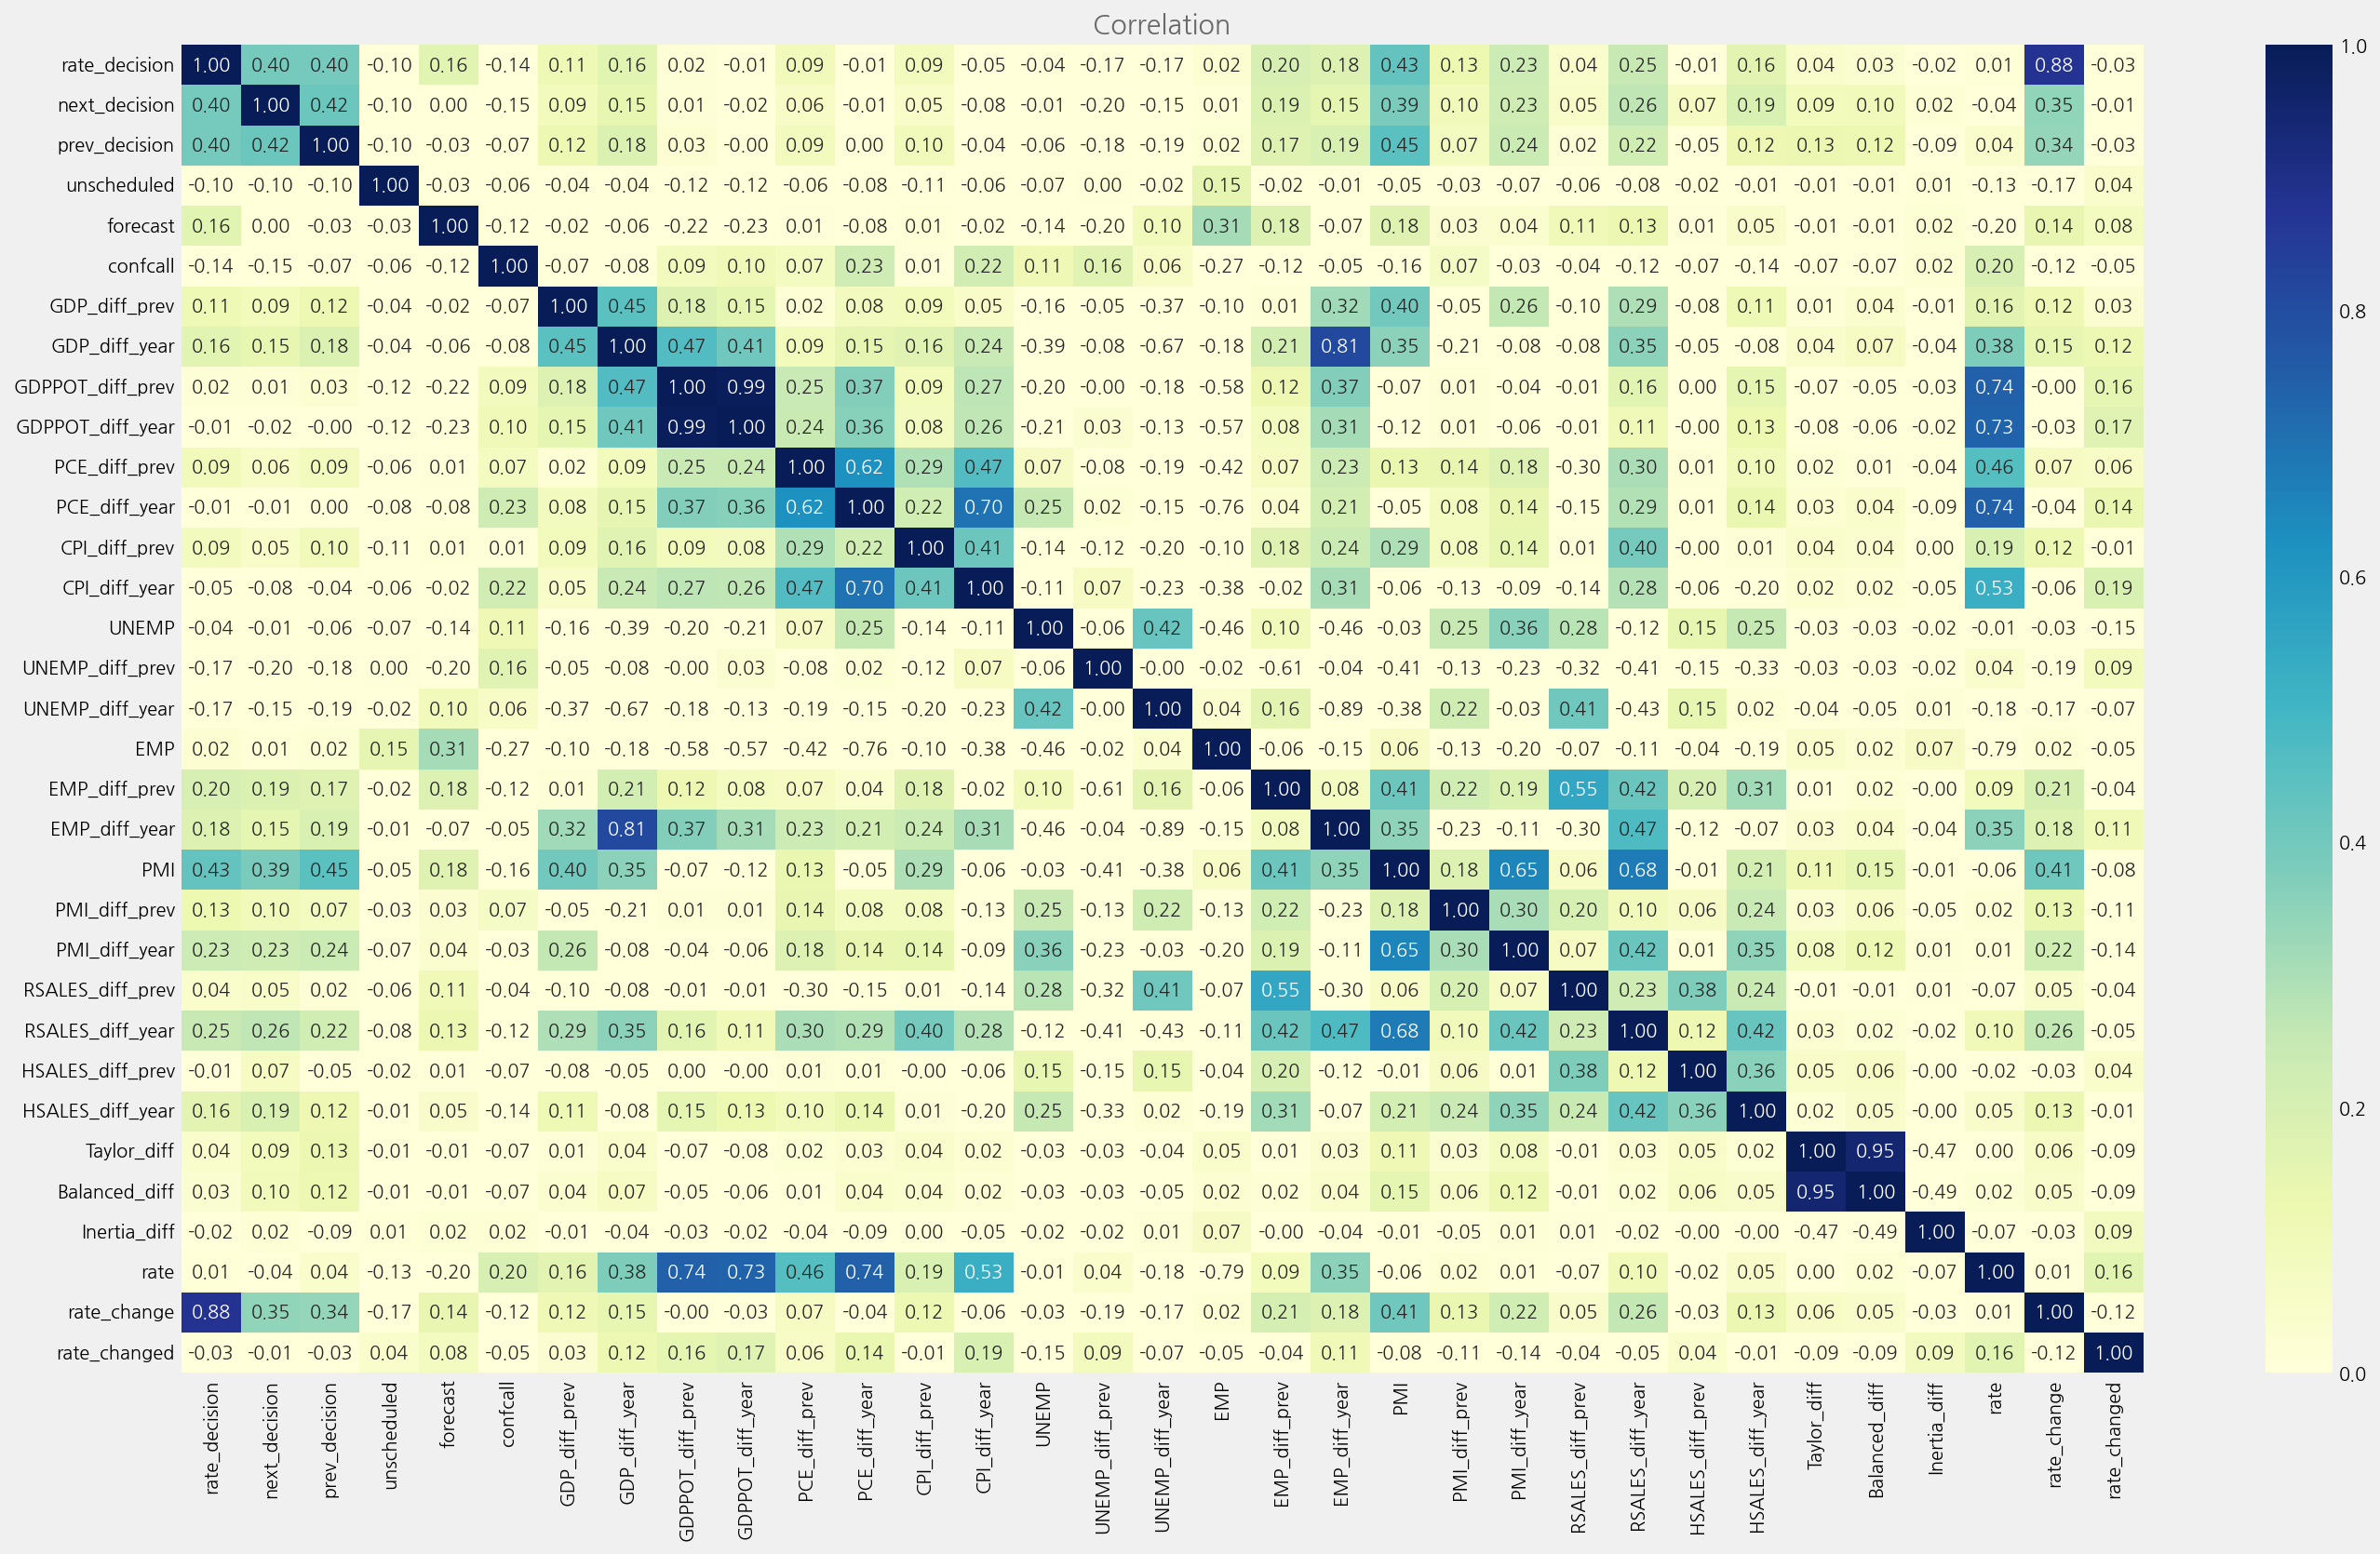

In [9]:
cfg = eKonf.compose("visualize/plot=heatmap")
cfg.figure.figsize = (20, 12)
cfg.heatmap.cmap = "YlGnBu"
cfg.heatmap.vmin = 0
cfg.heatmap.vmax = 1
cfg.heatmap.fmt = ".2f"
cfg.ax.title = "Correlation"
eKonf.instantiate(cfg, data=corr_data)


Observation on the correlation:

Higher correlation with Rate Decision:

- 'GDP_diff_year'
- 'Unemp_diff_prev'
- 'Employ_diff_prev'
- 'PMI'
- 'RSALES_diff_year'
- 'HSALES_diff_year'
- 'prev_decision'

Will create two dataset, one full set and the other smaller set with high correlation


### Correlation between Taylor rule and actual rates


In [10]:
corr_columns = ["Rate", "Taylor", "Balanced", "Inertia"]
corr_data1 = econ_data[corr_columns].astype(float).corr()
corr_columns = ["rate_change", "Taylor_diff", "Balanced_diff", "Inertia_diff"]
corr_data2 = econ_data[corr_columns].astype(float).corr()


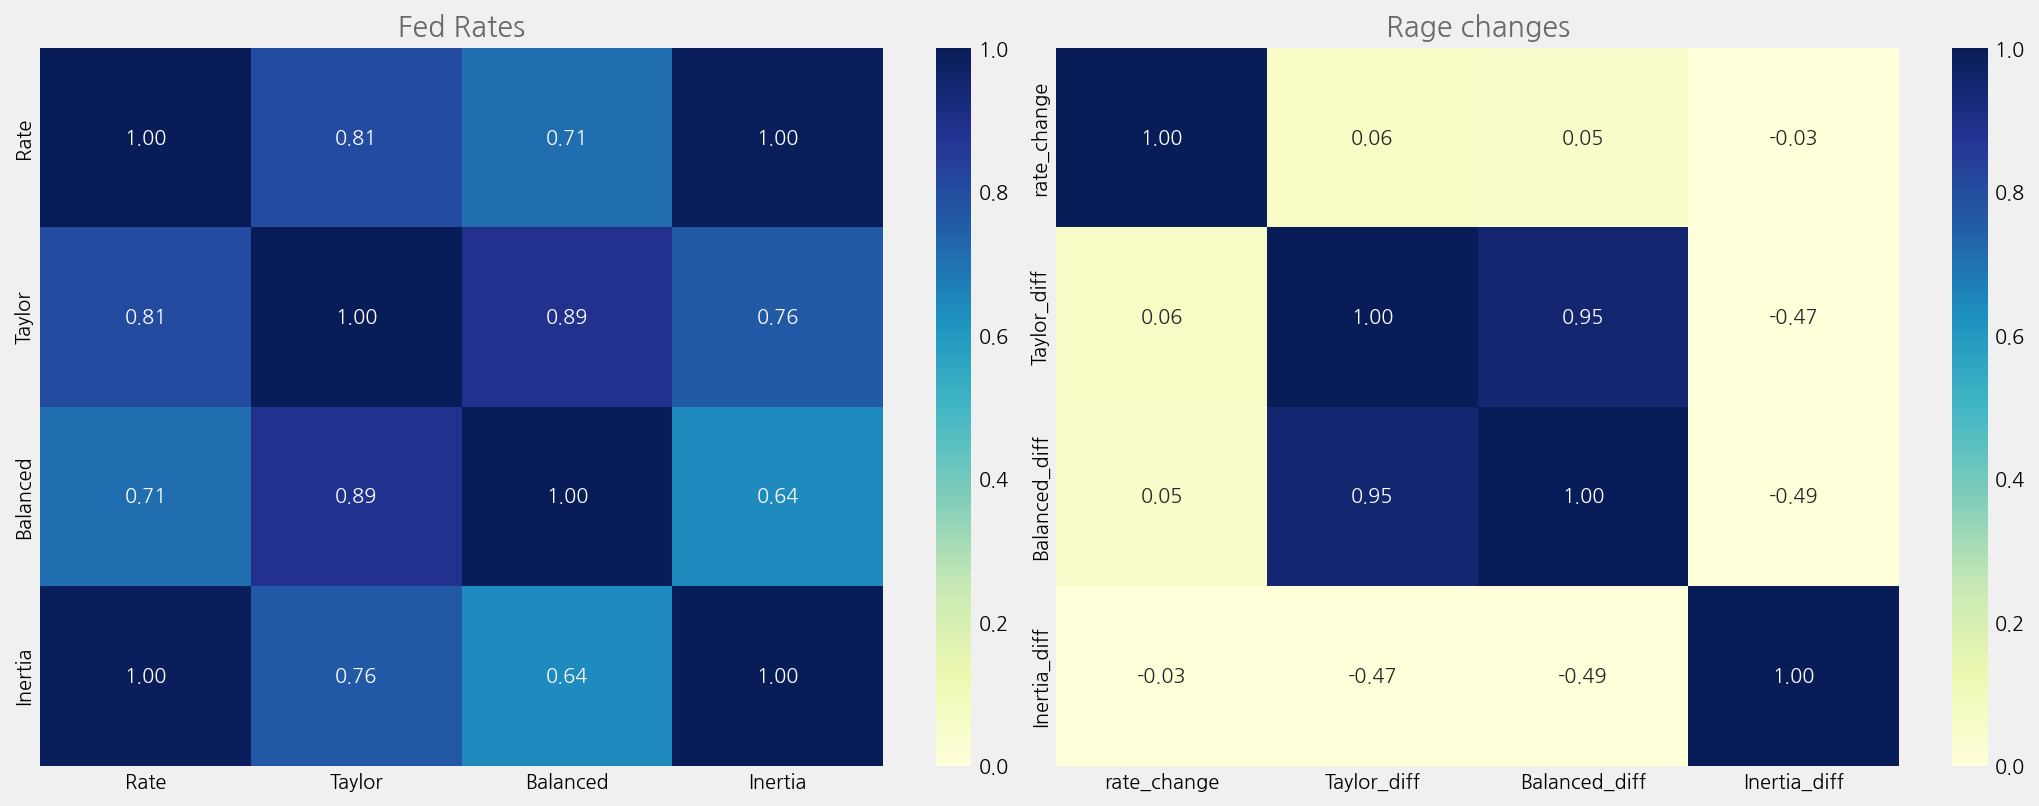

In [11]:
cfg = eKonf.compose("visualize/plot=heatmap")
cfg.figure.figsize = (15, 6)
cfg.subplots.ncols = 2
cfg.subplots.nrows = 1
cfg.heatmap.axno = 0
cfg.heatmap.datano = 0
cfg.heatmap.cmap = "YlGnBu"
cfg.heatmap.vmin = 0
cfg.heatmap.vmax = 1
cfg.heatmap.fmt = ".2f"
cfg.ax.title = "Fed Rates"
cfg.ax.axno = 0
heatmap2 = cfg.heatmap.copy()
heatmap2.axno = 1
heatmap2.datano = 1
ax2 = cfg.ax.copy()
ax2.title = "Rage changes"
ax2.axno = 1
cfg.plots.append(heatmap2)
cfg.axes.append(ax2)
eKonf.instantiate(cfg, data=[corr_data1, corr_data2])


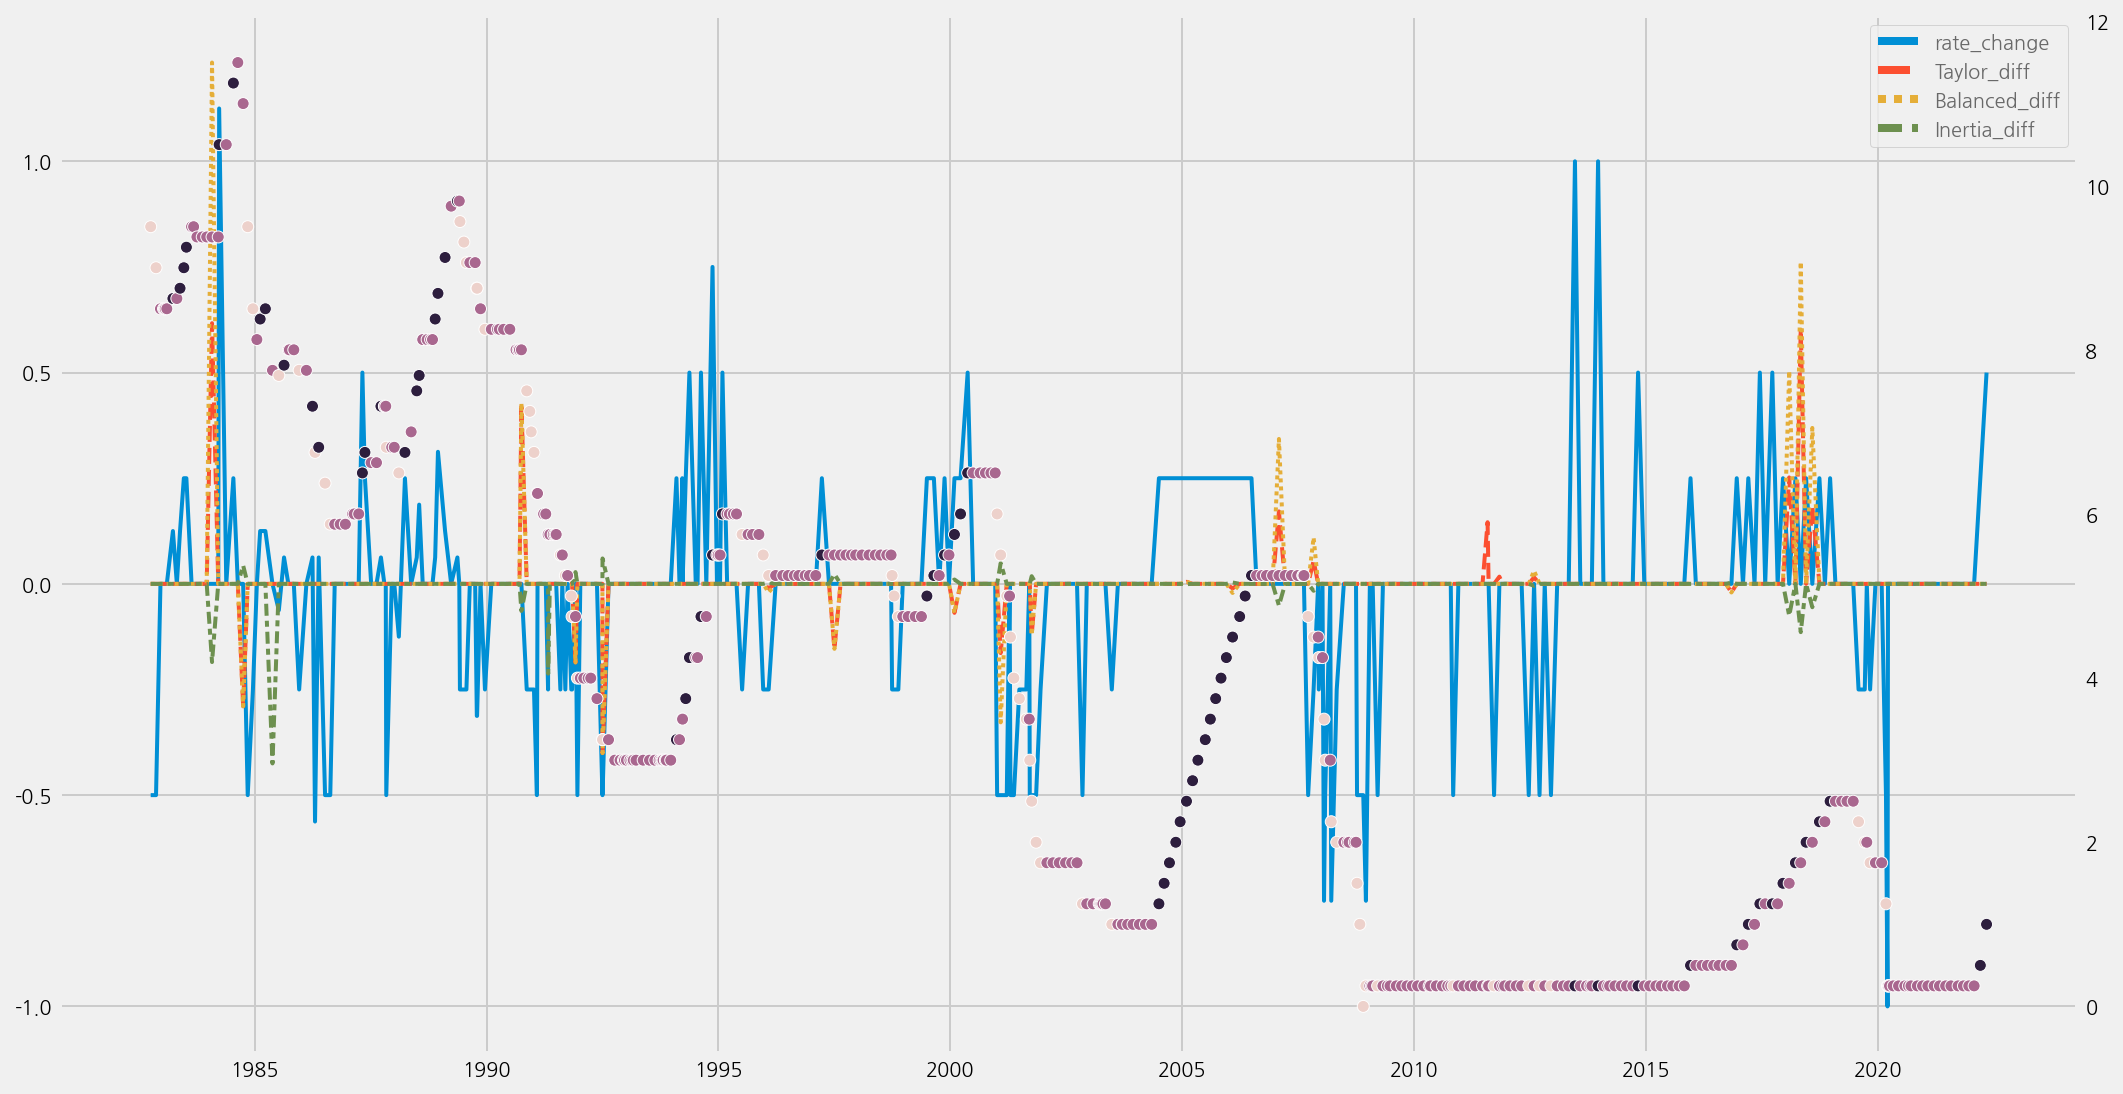

In [12]:
cfg = eKonf.compose("visualize/plot=lineplot")
cfg.figure.figsize = (15, 8)
cfg.lineplot.y = corr_columns

scatter_cfg = eKonf.compose("visualize/plot/scatterplot")
scatter_cfg.x = "date"
scatter_cfg.y = "rate"
scatter_cfg.hue = "rate_decision"
scatter_cfg.secondary_y = True
cfg.plots.append(scatter_cfg)

ax2 = cfg.ax.copy()
ax2.grid = False
ax2.secondary_y = True
cfg.axes.append(ax2)

eKonf.instantiate(cfg, data=econ_data)
